In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [6]:
ticker = "PG"
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source="yahoo", start="2007-1-1")["Adj Close"]

In [7]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2017-08-23,-0.003779
2017-08-24,-0.001841
2017-08-25,0.002598
2017-08-28,-0.000432
2017-08-29,-0.001623


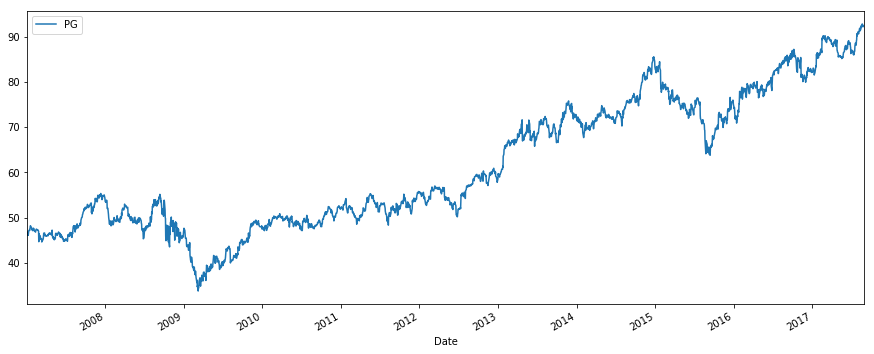

In [8]:
data.plot(figsize=(15,6))

In [9]:
u = log_returns.mean()
var = log_returns.var()

In [10]:
drift = u - (0.5 * var)
stdev = log_returns.std()

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
stdev.values

array([ 0.01098446])

In [14]:
np.array(drift)

array([ 0.00019249])

In [20]:
norm.ppf(0.9545)

1.6901461375274707

In [21]:
x = np.random.rand(10,2)
x

array([[ 0.1964263 ,  0.83517275],
       [ 0.82500327,  0.89231795],
       [ 0.36941181,  0.24392674],
       [ 0.47959921,  0.5516298 ],
       [ 0.75262797,  0.76851911],
       [ 0.62891593,  0.53214535],
       [ 0.10504519,  0.24127524],
       [ 0.24661047,  0.26742741],
       [ 0.03905626,  0.60879513],
       [ 0.6050363 ,  0.73734392]])

In [22]:
norm.ppf(x)

array([[-0.8544556 ,  0.97481003],
       [ 0.93460198,  1.23894978],
       [-0.33341158, -0.69372691],
       [-0.05115951,  0.1297801 ],
       [ 0.68278286,  0.73397859],
       [ 0.32898352,  0.08066382],
       [-1.25331694, -0.70220635],
       [-0.68519489, -0.62061219],
       [-1.76174426,  0.2761801 ],
       [ 0.26640489,  0.63517827]])

In [23]:
Z = norm.ppf(np.random.rand(10,2))

In [24]:
t_intervals = 1000 #1000 days
iterations = 10

In [25]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [28]:
s0 = data.iloc[-1]
s0

PG    92.32
Name: 2017-08-29 00:00:00, dtype: float64

In [31]:
price_list = np.zeros_like(daily_returns)

In [32]:
price_list[0] = s0

In [33]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

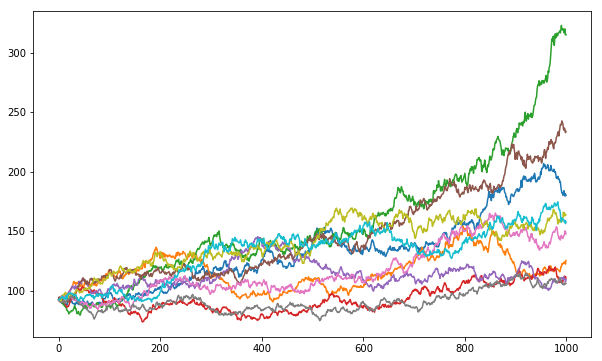

In [28]:
plt.figure(figsize = (10,6))
plt.plot(price_list)